In [259]:
# Import Dependencies
import pandas as pd
from matplotlib import pyplot
from fbprophet import Prophet
from pandas import to_datetime
from pandas import DataFrame
import datetime as dt

In [260]:
# Read the dataset
sales_df = pd.read_csv("Resources/Sales_Data - Only the columns we need.csv")
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60
1,2013,7,07/04/2013,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52
2,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80
3,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20
4,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40


In [261]:
# Get to know the data types of the data in each column
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR_        35948 non-null  int64  
 1   MONTH_       35948 non-null  int64  
 2   InvDate      35948 non-null  object 
 3   InvNumber    35948 non-null  object 
 4   Market       35948 non-null  object 
 5   InvCustomer  35948 non-null  object 
 6   CompanyName  35948 non-null  object 
 7   ItemClass    35948 non-null  object 
 8   SubCategory  35948 non-null  object 
 9   Flavours     35948 non-null  object 
 10  Product      35948 non-null  int64  
 11  Description  35948 non-null  object 
 12  Config       35948 non-null  object 
 13  UOM          35948 non-null  object 
 14  Real_Qty     35948 non-null  int64  
 15  CAD_Value    35948 non-null  float64
dtypes: float64(1), int64(4), object(11)
memory usage: 4.4+ MB


In [262]:
# Convert the InvDate column into datetime64 format
sales_df['InvDate'] = pd.DatetimeIndex(sales_df['InvDate'])
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40


In [263]:
# Remove the data after June 30, 2019 as there is a significant deline on sales
sales_df_new = sales_df.drop(sales_df[sales_df['InvDate'] > '2019-06-30'].index)
sales_df_new.tail()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
25966,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,PEANUT,600919,NATCAN Peanut,Organic 40gx16x8,CS,2,268.18
25967,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600914,NATCAN Cashew Nut,Organic 40gx16x8,CS,4,536.36
25968,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,GRAN,PEANUT BUTTER,600984,NATCANGRA5PK Chocolate PB,Organic 35gx5x12,CS,2,77.76
25969,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,CONV,LSUG,PEANUT CARAMEL,600987,NATCANLS Peanut Caramel,Conventional 40gx12x8,CS,2,201.60
25970,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,WALNUT,600911,NATCAN Walnut,Organic 40gx16x8,CS,5,670.45


In [264]:
# Add a new column month_year to groupby month
sales_df_new['month_year'] = pd.to_datetime(sales_df['InvDate']).dt.to_period('M')
sales_df_new.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value,month_year
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60,2013-07
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52,2013-07
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80,2013-07
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20,2013-07
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40,2013-07


In [265]:
# Remove the unwanted column data
sales_df_new_2 = sales_df_new.drop(["YEAR_","MONTH_","InvDate","InvNumber","Market","InvCustomer","CompanyName","ItemClass","SubCategory","Flavours","Product","Description","Config","UOM","Real_Qty"], axis=1)
sales_df_new_2.head()

,CAD_Value,month_year
0,153.60,2013-07
1,2731.52,2013-07
2,460.80,2013-07
3,307.20,2013-07
4,614.40,2013-07


In [266]:
# Rearrange the column position
sales_df_new_2 = sales_df_new_2[["month_year","CAD_Value"]]
sales_df_new_2.head()

,month_year,CAD_Value
0,2013-07,153.60
1,2013-07,2731.52
2,2013-07,460.80
3,2013-07,307.20
4,2013-07,614.40


In [267]:
# Groupby month and sum the CAD_Value i.e sales
sales_df_new_grouped = sales_df_new_2.groupby(["month_year"], as_index=False)["CAD_Value"].sum()
sales_df_new_grouped

,month_year,CAD_Value
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06
...,...,...
67,2019-02,6.160768e+05
68,2019-03,7.686584e+05
69,2019-04,1.883854e+06
70,2019-05,9.755937e+05


In [268]:
# Check the data types
sales_df_new_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month_year  72 non-null     period[M]
 1   CAD_Value   72 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 1.7 KB


In [269]:
# from the prophet documentation every variables should have specific names hence renaming the columns
sales_df_new_grouped = sales_df_new_grouped.rename(columns = {'month_year': 'ds',
                                'CAD_Value': 'y'})
sales_df_new_grouped.head()

,ds,y
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06


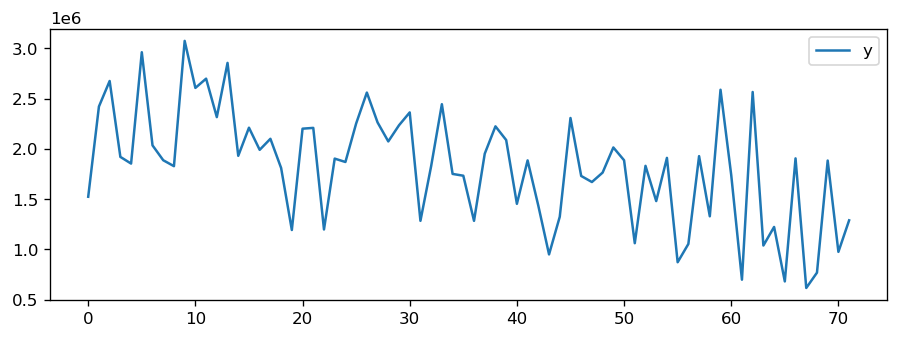

In [270]:
# Plot a time series of the existing data
sales_df_new_grouped.plot()
pyplot.show()

In [271]:
# Convert "ds" to timestamp format
sales_df_new_grouped['ds'] = sales_df_new_grouped['ds'].dt.to_timestamp('s').dt.strftime('%Y-%m')
sales_df_new_grouped.head()

,ds,y
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06


In [272]:
# Check the data types
sales_df_new_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      72 non-null     object 
 1   y       72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [273]:
# Initialize Prophet library
model = Prophet()

In [274]:
# Fit the data in the Prophet model
model.fit(sales_df_new_grouped)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AttributeError: 'StanModel' object has no attribute 'fit_class'

In [275]:
# Create a dataframe for the future period based on the desired future frequency
future = model.make_future_dataframe(periods=24,freq='M')
future.head()

,ds
0,2013-07-01
1,2013-08-01
2,2013-09-01
3,2013-10-01
4,2013-11-01


In [276]:
# Predict the future months using the Prophet library which analyses the seasonality trends in the dataset
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail() 

KeyError: 'k'

In [277]:
#future = list()
#for i in range(1, 13):
   #date = '2019-%02d' % i
   # future.append([date])
#future = DataFrame(future)
#future.columns = ['ds']
#future['ds']= to_datetime(future['ds'])

In [278]:
#forecast = model.predict(future)
#print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

In [279]:
# Plot the predicted data. Black dots represent the actual data, blue line respresents the predicted data and blue space indicates the uncertainty which is 80% by default
fig1 = model.plot(forecast)

NameError: name 'forecast' is not defined

In [280]:
# Plot components for seasonality trends
fig2 = model.plot_components(forecast)

NameError: name 'forecast' is not defined

In [281]:
# Python plot for interactive graphs
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

ModuleNotFoundError: No module named 'prophet'

In [282]:
# Python plot for interactive component graphs
plot_components_plotly(model, forecast)

NameError: name 'plot_components_plotly' is not defined

In [283]:
forecast[['ds','yhat']].head()

NameError: name 'forecast' is not defined

In [284]:
forecast_only = forecast.loc[(forecast['ds'] > '2019-06-30')]
forecast_only[["ds","yhat"]].head()

NameError: name 'forecast' is not defined

In [285]:
forecast_only_2 = forecast_only[['ds','yhat']]
forecast_only_2.head()

NameError: name 'forecast_only' is not defined

In [286]:
forecast_only_2.to_csv('Resources/Predictions.csv', index=False)

NameError: name 'forecast_only_2' is not defined

In [287]:
#Arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [288]:
from statsmodels.tsa.stattools import adfuller, kpss

In [289]:
# Test
# ADF Test
result = adfuller(sales_df_new_grouped.y, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.6925843235075102
p-value: 0.8486610258425392
Critial Values:
   1%, -3.5443688564814813
Critial Values:
   5%, -2.9110731481481484
Critial Values:
   10%, -2.5931902777777776


In [290]:
# KPSS Test
result = kpss(sales_df_new_grouped.y, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.620292
p-value: 0.020792
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Shay\.conda\envs\PythonData\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [291]:
# Forecast Using Auto Arima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(sales_df_new_grouped.y, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2106.535, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2289.097, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2144.956, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2250.563, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2107.918, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2107.407, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2240.951, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2128.784, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2110.095, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2112.004, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.338 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 0, 1)   Log Likelihood        

In [292]:
# Based on the results above the best models are: ARIMA(1,0,1)(0,0,0)[0] 

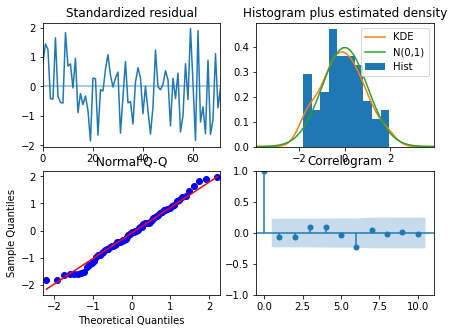

In [293]:
# omit
model.plot_diagnostics(figsize=(7,5))
plt.show()

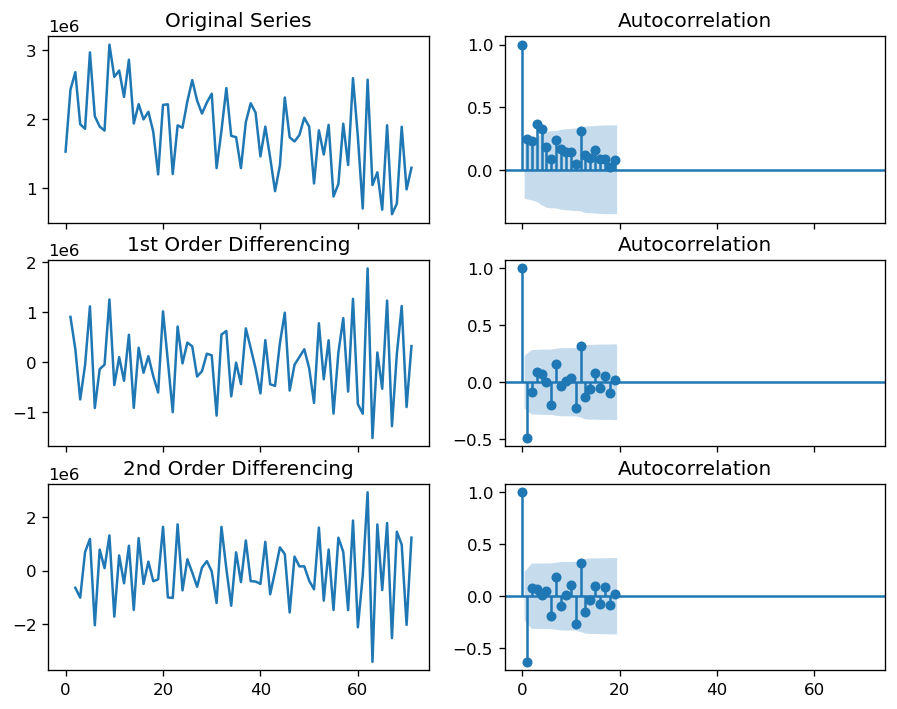

In [294]:

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(sales_df_new_grouped.y); axes[0, 0].set_title('Original Series')
plot_acf(sales_df_new_grouped.y, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sales_df_new_grouped.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sales_df_new_grouped.y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sales_df_new_grouped.y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sales_df_new_grouped.y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

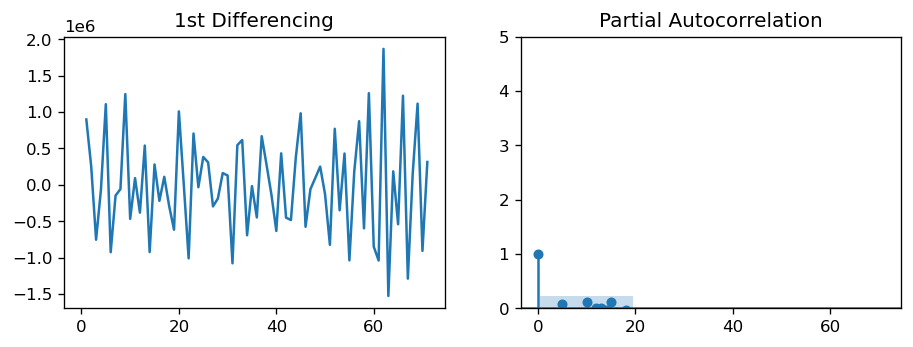

In [295]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sales_df_new_grouped.y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(sales_df_new_grouped.y.diff().dropna(), ax=axes[1])

plt.show()

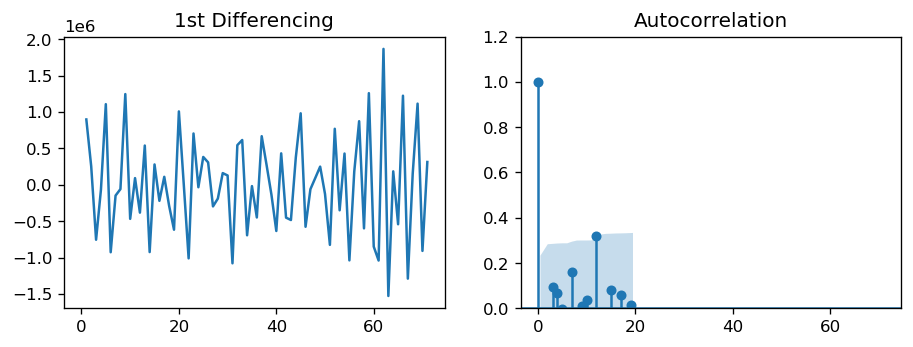

In [296]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sales_df_new_grouped.y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(sales_df_new_grouped.y.diff().dropna(), ax=axes[1])

plt.show()

In [297]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(sales_df_new_grouped.y, order=(0,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   72
Model:                     ARMA(0, 0)   Log Likelihood               -1056.035
Method:                           css   S.D. of innovations         567057.423
Date:                Mon, 27 Sep 2021   AIC                           2116.070
Time:                        21:00:08   BIC                           2120.624
Sample:                             0   HQIC                          2117.883
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.826e+06   6.68e+04     27.324      0.000     1.7e+06    1.96e+06


C:\Users\Shay\.conda\envs\PythonData\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


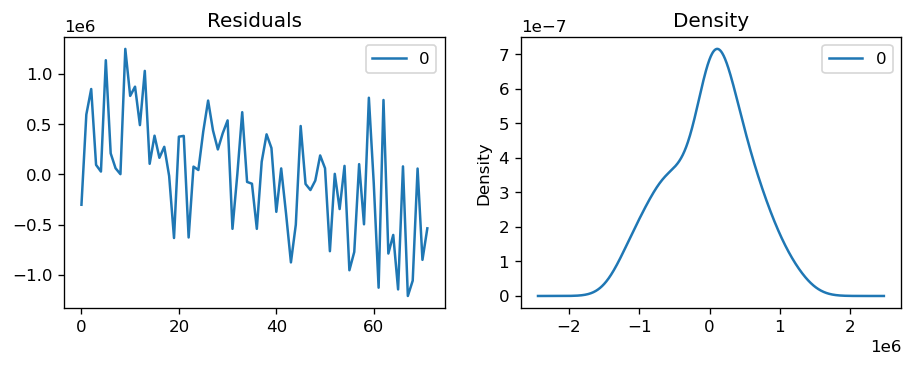

In [298]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

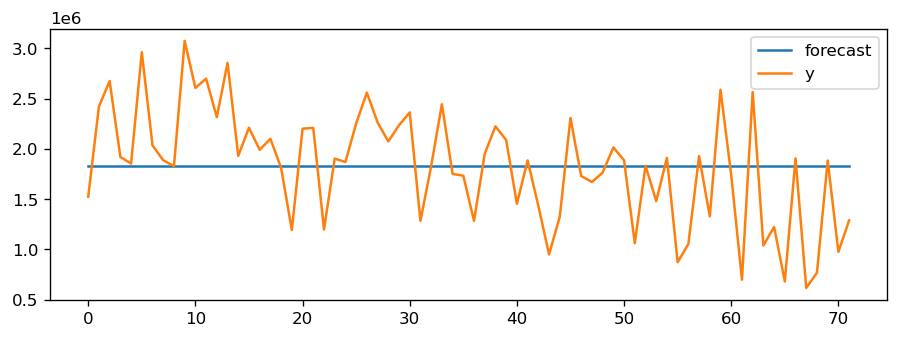

In [299]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [300]:
# Considering the dataset, Arima is not a good model to use
# Mar to Sep sales the pick up, goes down until Dec, and picks up on Jan
